In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trn = pd.read_csv('activity_train.csv')
tst = pd.read_csv('activity_test.csv')

# EDA:

In [4]:
trn.head(2)

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1,...,fBodyGyroJerkMag_Skewness_1,fBodyGyroJerkMag_Kurtosis_1,tBodyAcc_AngleWRTGravity_1,tBodyAccJerk_AngleWRTGravity_1,tBodyGyro_AngleWRTGravity_1,tBodyGyroJerk_AngleWRTGravity_1,tXAxisAcc_AngleWRTGravity_1,tYAxisAcc_AngleWRTGravity_1,tZAxisAcc_AngleWRTGravity_1,activity
0,0.04358,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.03948,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5


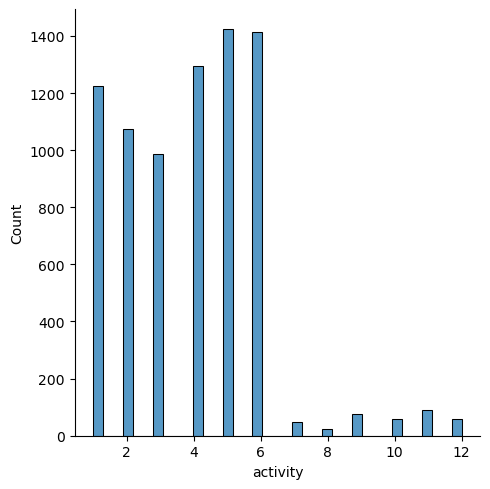

In [5]:
# Plot distribution of target variable
sns.displot(trn['activity'], kde=False)

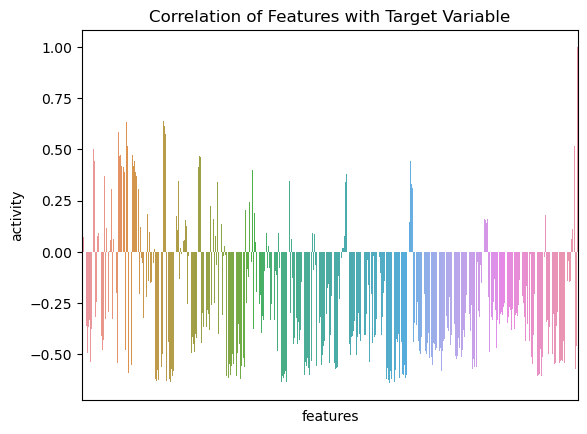

In [6]:
# Plot Corelation Matrix
corr = trn.corr()['activity']
plt.title('Correlation of Features with Target Variable')
sns.barplot(x=corr.index , y=corr)
plt.xticks([])
plt.xlabel('features')
plt.show()


In [7]:
# get the most correlated features
abs(corr).sort_values(ascending=False).head(16)

activity                  1.000000
fBodyAccJerk_STD_2        0.638705
tBodyAccJerk_Mad_2        0.638261
tBodyAccJerk_Min_1        0.637809
fBodyAccJerk_Max_2        0.636201
tBodyAccJerk_IQR_2        0.634802
tGravityAcc_Max_2         0.634243
tBodyAccJerkMag_SMA_1     0.633698
tBodyAccJerkMag_Mean_1    0.633698
tBodyAccJerk_SMA_1        0.632226
tBodyAccJerk_STD_2        0.632097
fBodyAccJerk_Mad_2        0.630663
fBodyAccJerk_STD_1        0.625893
tBodyAccJerk_Mad_1        0.624828
fBodyAccJerk_Mean_2       0.622618
fBodyAccJerk_Mad_1        0.622352
Name: activity, dtype: float64

In [8]:
# Plot the most correlated features
sns.scatterplot(x='fBodyAccJerk_STD_2', y='tGravityAcc_Max_2', hue='activity', data=trn, palette='Set2')

<AxesSubplot:xlabel='fBodyAccJerk_STD_2', ylabel='tGravityAcc_Max_2'>

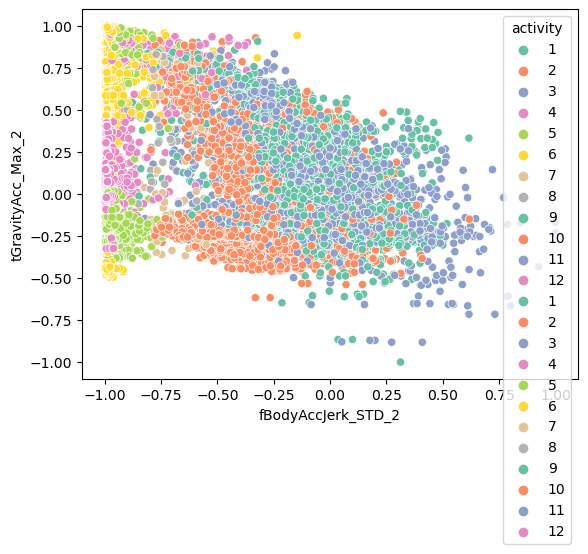

In [9]:
sns.scatterplot(x='tBodyAccJerk_Mad_2', y='tBodyAccJerk_Min_1', hue='activity', data=trn, palette='Set2')
plt.show()

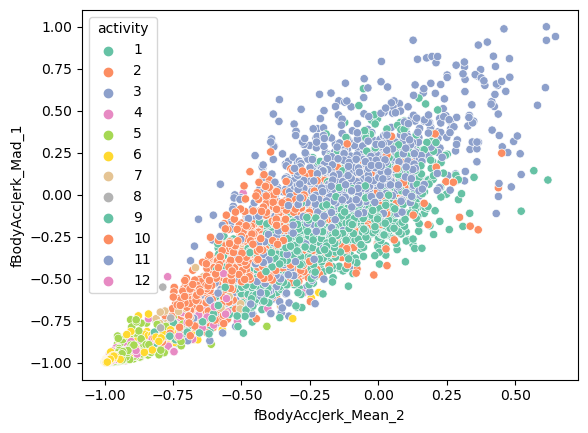

In [10]:
sns.scatterplot(x='fBodyAccJerk_Mean_2', y='fBodyAccJerk_Mad_1', hue='activity', data=trn, palette='Set2')
plt.show()

In [11]:
# Apply random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = trn.drop(['activity'], axis=1)
y_train = trn['activity']

X_test = tst.drop(['activity'], axis=1)
y_test = tst['activity']
rf_res = []
max_features_ = [2, 5, 7, 10, 25, 50, 100, 300]
for i in max_features_: 
    rf = RandomForestClassifier(n_jobs=-1, max_features=i, n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_res.append(accuracy_score(y_test, y_pred))
    print('max_features = ', i, 'accuracy = ', accuracy_score(y_test, y_pred))
results ={'max_features': max_features_, 'accuracy': rf_res}

max_features =  2 accuracy =  0.8937381404174574
max_features =  5 accuracy =  0.90955091714105
max_features =  7 accuracy =  0.9149272612270715
max_features =  10 accuracy =  0.9171410499683744
max_features =  25 accuracy =  0.9089184060721063
max_features =  50 accuracy =  0.9054395951929158
max_features =  100 accuracy =  0.9003795066413662
max_features =  300 accuracy =  0.898798228969007


In [12]:
max_features = 10
n_estimators_ = [50, 100, 200, 300, 400]

rf_res = []
for i in n_estimators_:
    rf = RandomForestClassifier(n_jobs=-1, max_features=max_features, n_estimators=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_res.append(accuracy_score(y_test, y_pred))
    print('n_estimators = ', i, 'accuracy = ', accuracy_score(y_test, y_pred))
results1 = {'n_estimators': n_estimators_, 'accuracy': rf_res}


n_estimators =  50 accuracy =  0.9117647058823529
n_estimators =  100 accuracy =  0.9212523719165086
n_estimators =  200 accuracy =  0.9218848829854522
n_estimators =  300 accuracy =  0.9190385831752056
n_estimators =  400 accuracy =  0.9218848829854522


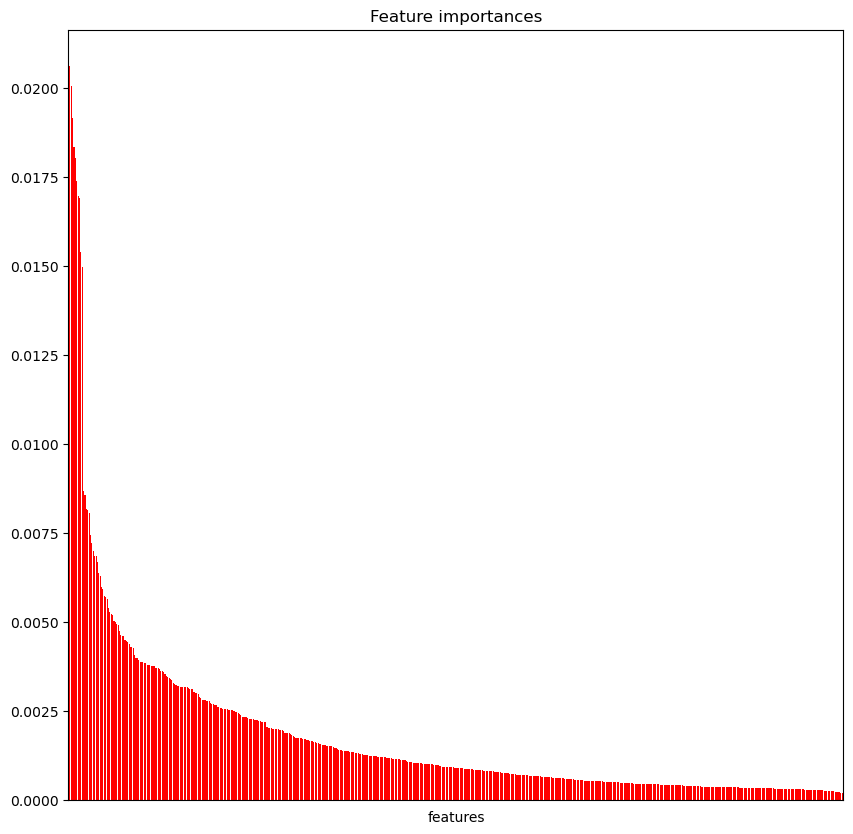

In [13]:
max_features = 10
n_estimators = 300

rf = RandomForestClassifier(n_jobs=-1, max_features=max_features, n_estimators=n_estimators)
rf.fit(X_train, y_train)

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
         color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xticks([])
plt.xlabel('features')
plt.show()

In [14]:
# Get the most important features
X_train1 = X_train[X_train.columns[indices][:250]]
X_test1 = X_test[X_test.columns[indices][:250]]

# Apply random forest with the most important features
rf = RandomForestClassifier(n_jobs=-1, max_features=max_features, n_estimators=n_estimators)
rf.fit(X_train1, y_train)
y_pred = rf.predict(X_test1)
print('accuracy = ', accuracy_score(y_test, y_pred))    

accuracy =  0.9111321948134092


In [15]:
# remap the target variable
old_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
new_vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_train = y_train.replace(old_vals, new_vals)
y_test = y_test.replace(old_vals, new_vals)

In [17]:
# apply xgboost
from xgboost import XGBClassifier
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_res = []
max_depth_ = [3, 5, 7, 9, 11]
for i in max_depth_:
    xgb = XGBClassifier(n_jobs=-1, max_depth=i, n_estimators=n_estimators, verbosity=0, use_label_encoder=False)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_res.append(accuracy_score(y_test, y_pred))
    print('max_depth = ', i, 'accuracy = ', accuracy_score(y_test, y_pred))

max_depth =  3 accuracy =  0.9392789373814042
max_depth =  5 accuracy =  0.926944971537002
max_depth =  7 accuracy =  0.9218848829854522
max_depth =  9 accuracy =  0.91808981657179
max_depth =  11 accuracy =  0.915876027830487
